In [1]:
%matplotlib notebook

import warnings
warnings.simplefilter("ignore", FutureWarning)

# Learning a simple non-linear, noisy function... eagerly
Code taken from the `basic_autoencoder` but specified with tf.eager. Interesting to see if this makes it easier to develop models!

Resources:
  * "Getting started" in the tf docs: https://www.tensorflow.org/get_started/eager
  * Basic regression example: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/eager/python/examples/linear_regression/linear_regression.py  

<IPython.core.display.Javascript object>


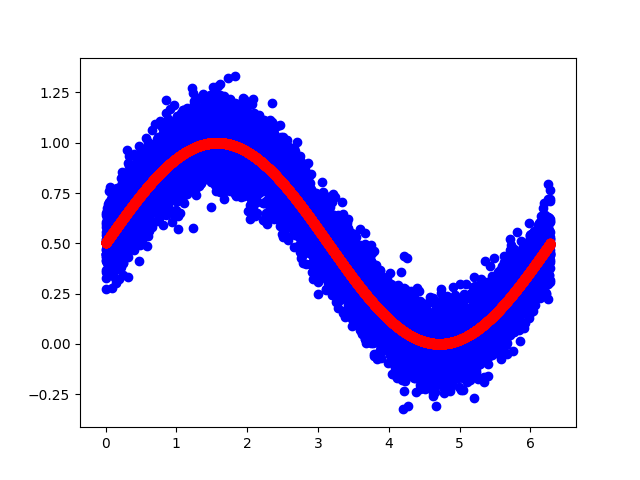

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

tf.enable_eager_execution()

N = 1000 # observations
P = 10000 # samples
epochs = 100

domain = np.linspace(0, 2.*np.pi, P)
Y = np.sin(domain)
amin = np.amin(Y)
amax = np.amax(Y)
Y = (Y - amin) / (amax - amin) 
X = np.array([Y + np.random.normal(size=P, scale=0.1) for _ in range(N)])

plt.scatter(domain, X[0,:], color='b')
plt.scatter(domain, Y, color='r')
plt.show()

Specify our model:

In [17]:
class Autoencoder():
    def __init__(x):
        # encoder
        self.enc_layer1 = tf.layers.dense(inputs=x, units=512, activation=tf.nn.sigmoid)
        self.enc_layer2 = tf.layers.dense(inputs=self.enc_layer1, units=256, activation=tf.nn.sigmoid)
        self.latent_space = tf.layers.dense(inputs=self.enc_layer2, units=128, activation=tf.nn.sigmoid)

        # decoder
        self.dec_layer1 = tf.layers.dense(inputs=self.latent_space, units=128, activation=tf.nn.sigmoid)
        self.dec_layer2 = tf.layers.dense(inputs=self.dec_layer1, units=256, activation=tf.nn.sigmoid)
        self.dec_layer3 = tf.layers.dense(inputs=self.dec_layer2, units=512, activation=tf.nn.sigmoid)
        self.x_hat = tf.layers.dense(inputs=self.dec_layer3, units=P)

    def predict(x):
        return self.x_hat

Define the loss, gradients and optimizer for our model:

In [18]:
def mse_loss(x):
    return tf.losses.mean_squared_error(labels=x, predictions=model.predict(x))

loss_and_grads = tfe.implicit_value_and_gradients(mse_loss)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

Our training program:

In [15]:
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset.repeat(epochs)

for epoch in range(epochs):
    for x in tfe.Iterator(dataset):
        x = tf.reshape(x, [1, P])
        loss, grads = loss_and_grads(x)
        optimizer.apply_gradients(grads)
        print('loss: {:.4f}'.format(loss))
        

loss: 0.4083
loss: 0.4105
loss: 0.4096
loss: 0.4091
loss: 0.4109
loss: 0.4102
loss: 0.4141
loss: 0.4090
loss: 0.4104
loss: 0.4124


KeyboardInterrupt: 